# Causalidad

In [1]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

- 31 pacients con dolor lumbar asignados al azar.

Tratamiento: 

- 15 pacientes en el grupo de tratamiento
- Se le suministro el medicamento

Control: 

- 16 pacientes en el grupo de control.
- Se le suministro suero fisiológico(salina normal)



Los médicos que suministraban el medicamento: 
- No conocian cual era el grupo de control y tratamiento, es decir, no sabian cual era el medicamento suministrado(salina o el tratamiento para el dolor de espalda)
 

In [14]:
bta = Table.read_table('bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [15]:
bta.group("Group")

Group,count
Control,16
Treatment,15


In [16]:
bta.group("Group", np.sum)

Group,Result sum
Control,2
Treatment,9


¿Que conclusiones podemos sacar, leyendo este dataset?

In [17]:
bta.group("Group", np.average)

Group,Result average
Control,0.125
Treatment,0.6


- 60% de los pacientes se recuperaron en el grupo de tratamiento
- 12.5% se recuperacron en el grupo de control

In [18]:
resultados_observados = Table.read_table("resultados_observados.csv")

1. ¿Que resultados hubiera obtenido el grupo de control si se asigna al grupo de tratamiento?, 
el resultado es desconocido

2. ¿Que resultados hubiera obtenido el grupo de tratamiento  si se asigna al grupo de control?, 
el resultado es desconocido

In [7]:
resultados_observados.show()

Unnamed: 0,Group,Result,AsignaTratamiento,AsignaControl
0,Control,1,Desconocido,1.0
1,Control,1,Desconocido,1.0
2,Control,0,Desconocido,0.0
3,Control,0,Desconocido,0.0
4,Control,0,Desconocido,0.0
5,Control,0,Desconocido,0.0
6,Control,0,Desconocido,0.0
7,Control,0,Desconocido,0.0
8,Control,0,Desconocido,0.0
9,Control,0,Desconocido,0.0


In [19]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [21]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

In [22]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [23]:
distance(bta, 'Group')

0.475

In [24]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [25]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

Group,Result,Shuffled Label
Control,1,Treatment
Control,1,Control
Control,0,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Control


**Causalidad:** la prueba es evidencia de que el tratamiento causa la diferencia

# Otro ejemplo. 

# # 🏈 El manejo de las pelotas en el fútbol americano (NFL)

En el fútbol americano, especialmente en la **NFL**, el manejo de las pelotas es un aspecto importante y tiene reglas específicas.



---

## 📌 Cada equipo lleva sus propias pelotas  
- Antes de cada partido, **cada equipo proporciona 12 pelotas oficiales** para usar en sus posesiones ofensivas.  
- Estas pelotas están preparadas según las preferencias del equipo (*presión, textura, grip*, etc.), siempre cumpliendo con las normas de la **NFL**.  
- Además, se entregan **pelotas especiales** para equipos especiales (*kickoffs, despejes y goles de campo*), conocidas como **K-balls** (que son nuevas y sin modificar).

---

## 📌 ¿Por qué a veces se usa más la pelota de un equipo que la del otro?  
Esto depende de **quién está a la ofensiva**:  
- Cuando **el equipo A** tiene la posesión del balón, se usa **su pelota**.  
- Cuando **el equipo B** tiene la posesión, se usa **la pelota de ese equipo**.  

📊 Si durante el partido un equipo tiene la posesión por más tiempo (*por ejemplo, largas series ofensivas*), su pelota se usará más.

---

## 📌 Intercepciones, fumbles y cambios de posesión  
- Si ocurre un **fumble** o **intercepción**, el balón usado **sigue en juego** hasta que la jugada termine.  
- Luego, al iniciar la siguiente jugada, se cambia a la **pelota del equipo que ahora está a la ofensiva**.

---

## 📌 Reglas tras el escándalo del *Deflategate*  
Después del famoso escándalo del **Deflategate (2015)**, que es lo que revisaremos en lo que sigue, la **NFL** reforzó las reglas:

- ✅ Ahora, las pelotas son **revisadas antes del partido** por un **oficial de la NFL**.  
- ✅ Durante el partido, están bajo la **supervisión de los árbitros**.  
-----

La presión a menudo se mide en libras por pulgada cuadrada (psi). Las reglas de la NFL estipulan que las pelotas de juego deben inflarse para tener presiones en el rango de 12,5 psi y 13,5 psi. Cada equipo juega con 12 bolas. Los equipos tienen la responsabilidad de mantener la presión en sus propios balones de fútbol, pero los oficiales del juego inspeccionan los balones. Antes del inicio del partido de la AFC, todas las pelotas de los Patriots estaban a unas 12,5 psi. La mayoría de las pelotas de los Colts estaban a unas 13,0 psi. Sin embargo, estos datos previos al partido no se registraron.



In [26]:
football = Table.read_table("team_scores.csv")
football

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [27]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    ).drop(1, 2)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [28]:
np.ones(11)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [30]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

In [31]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


In [77]:
football = football.drop('Combined')
football.group('Team', np.average)

Team,Pressure Drop average
Colts,0.46875
Patriots,1.20227





¿Cómo llega el azar aquí? No se estaba seleccionando nada al azar. Pero podemos hacer un modelo de azar planteando la hipótesis de que las 11 caídas de los Patriots parecen una muestra aleatoria de 11 de las 15 caídas, siendo las cuatro restantes de las caídas de los Colts. Ese es un modelo de oportunidad completamente especificado bajo el cual podemos simular datos. Así que es la hipótesis nula.

Para la alternativa, podemos tomar la posición de que las caídas de los Patriots son demasiado grandes, en promedio, para parecerse a una muestra aleatoria extraída de todas las caídas


# Estadístico de prueba

In [78]:
observed_means = football.group('Team', np.average).column(1)
observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

0.733522727272728

In [79]:
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [81]:
difference_of_means(football, 'Team')

0.733522727272728

In [82]:
shuffled_labels = football.sample(with_replacement=False).column(0)
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

Team,Pressure Drop,Shuffled Label
Patriots,0.85,Colts
Patriots,1.475,Patriots
Patriots,1.175,Patriots
Patriots,1.65,Patriots
Patriots,1.225,Patriots
Patriots,0.725,Patriots
Patriots,0.425,Colts
Patriots,1.175,Patriots
Patriots,1.35,Patriots
Patriots,1.8,Patriots


In [83]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.6823863636363636

In [84]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

# Prueba de la permutacion

In [85]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement = False
                                                    ).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [86]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

Observed Difference: 0.733522727272728


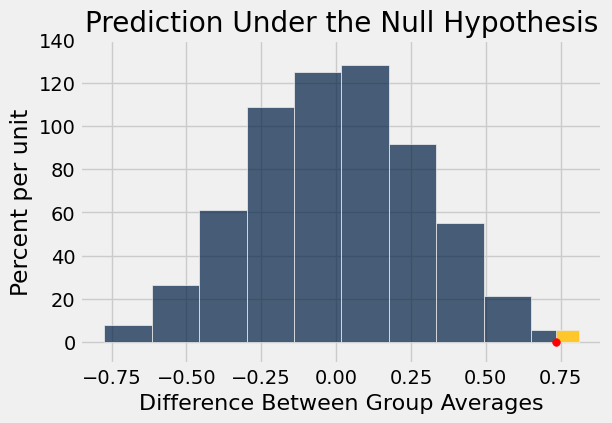

In [87]:
Table().with_column(
    'Difference Between Group Averages', differences).hist(
    left_end = observed_difference
)
plots.ylim(-0.1, 1.4)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

In [88]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.0025